In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.float_format = '{:.7f}'.format

pd.options.display.max_rows = None

2.5.0


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Statistical NLP/blogtext.csv')

In [5]:
df.sample(5)

,id,gender,age,topic,sign,date,text
644675,2755041,female,23,indUnk,Aquarius,"30,June,2004","Had a whirlwind of a weekend in CT, lun..."
221416,3489244,female,45,indUnk,Gemini,"07,July,2004",urlLink Yesterdays Foam Tray Print&...
518432,1977468,female,23,Student,Taurus,"08,August,2004",By Dave So what happens when you googl...
115761,3403444,female,14,indUnk,Taurus,"22,July,2004",COOLGAL805: ur weird. a lil crazy. and ...
598768,3495649,male,14,indUnk,Cancer,"12,June,2004",One day a little bunny named Jubble...


In [6]:
df.shape

(681284, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,681284.0000000,NaN,NaN,NaN,2397802.4033956,1247722.7013254,5114.0000000,1239610.0000000,2607577.0000000,3525660.0000000,4337650.0000000
gender,681284,2,male,345193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,681284.0000000,NaN,NaN,NaN,23.9323263,7.7860087,13.0000000,17.0000000,24.0000000,26.0000000,48.0000000
topic,681284,40,indUnk,251015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sign,681284,12,Cancer,65048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,681284,2616,"02,August,2004",16544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,681284,611652,urlLink,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(['id', 'date'], axis=1, inplace = True)

Taking a sample to train the data as the data is huge


In [10]:
df=df.head(10000)

In [11]:
df.shape

(10000, 5)

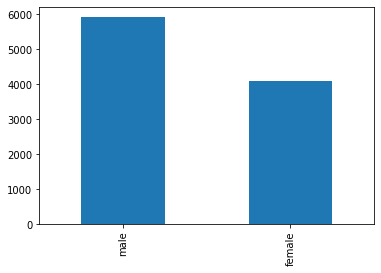

In [12]:
df['gender'].value_counts().plot(kind='bar')

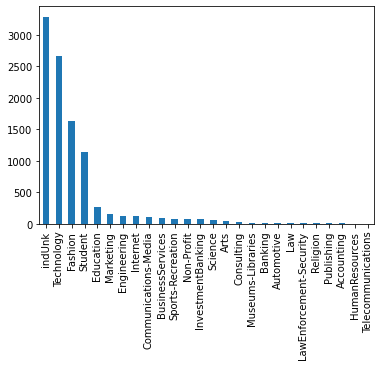

In [13]:
df['topic'].value_counts().plot(kind='bar')

In [14]:
df.columns

Index(['gender', 'age', 'topic', 'sign', 'text'], dtype='object')

In [15]:
df['text'] = df['text'].astype(str) #chaning text to string type to proceed with preparing data for model

In [16]:
df['review_text'] = df['text'].apply(lambda x: x.lower())
df.head(2)

,gender,age,topic,sign,text,review_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members: drewe...


In [17]:
df['review_text'] = df['review_text'].str.replace('[^\w\s]','')
df['review_text'].head(2)

0               info has been found  100 pages and ...
1               these are the team members   drewes...
Name: review_text, dtype: object

In [18]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df['review_text']=df['review_text'].apply(lambda x: ' '.join([words for words in x.split() if words not in stop]))

In [20]:
df['review_text'].head(2)

0    info found 100 pages 45 mb pdf files wait unti...
1    team members drewes van der laag urllink mail ...
Name: review_text, dtype: object

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemetize_text(text):
  return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [23]:
df['lem']= df['review_text'].apply(lemetize_text)
df['lem'].head(2)

0    info found 100 page 45 mb pdf file wait untill...
1    team member drewes van der laag urllink mail r...
Name: lem, dtype: object

In [24]:
df.head()

,gender,age,topic,sign,text,review_text,lem
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 pages 45 mb pdf files wait unti...,info found 100 page 45 mb pdf file wait untill...
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,team member drewes van der laag urllink mail r...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...,thanks yahoo toolbar capture url popupswhich m...


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer()

In [26]:
X= tfidf_vectorizer.fit_transform(df['lem'])

In [27]:
df["age"] = df["age"].astype(str)
df["labels"] = df.apply(lambda col :[col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [28]:
df.drop(columns=["gender","age","sign","topic"],axis =1, inplace = True)

In [29]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts

{'13': 42,
 '14': 212,
 '15': 602,
 '16': 440,
 '17': 1185,
 '23': 253,
 '24': 655,
 '25': 386,
 '26': 234,
 '27': 1054,
 '33': 136,
 '34': 553,
 '35': 2315,
 '36': 1708,
 '37': 33,
 '38': 46,
 '39': 79,
 '40': 1,
 '41': 20,
 '42': 14,
 '43': 6,
 '44': 3,
 '45': 16,
 '46': 7,
 'Accounting': 4,
 'Aquarius': 571,
 'Aries': 4198,
 'Arts': 45,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 91,
 'Cancer': 504,
 'Capricorn': 215,
 'Communications-Media': 99,
 'Consulting': 21,
 'Education': 270,
 'Engineering': 127,
 'Fashion': 1622,
 'Gemini': 150,
 'HumanResources': 2,
 'Internet': 118,
 'InvestmentBanking': 70,
 'Law': 11,
 'LawEnforcement-Security': 10,
 'Leo': 301,
 'Libra': 491,
 'Marketing': 156,
 'Museums-Libraries': 17,
 'Non-Profit': 71,
 'Pisces': 454,
 'Publishing': 4,
 'Religion': 9,
 'Sagittarius': 1097,
 'Science': 63,
 'Scorpio': 971,
 'Sports-Recreation': 80,
 'Student': 1137,
 'Taurus': 812,
 'Technology': 2654,
 'Telecommunications': 2,
 'Virgo': 236,
 'female': 4

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer

# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))


Y = binarizer.fit_transform(df["labels"])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test = train_test_split(X,Y, random_state =42, test_size=0.20)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(8000, 62814)
(2000, 62814)
(8000, 64)
(2000, 64)


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1= RandomForestClassifier(n_estimators= 230)

In [34]:
rf_clf1.fit(X_train, y1_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
print(rf_clf1.score(X_train,y1_train))

0.994625


In [36]:
y1_pred =rf_clf1.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

print('Accuracy score: ', accuracy_score(y1_test, y1_pred))
print('F1 score: ', f1_score(y1_test, y1_pred, average='micro'))
print('Average precision score: ', average_precision_score(y1_test, y1_pred, average='micro'))
print('Average recall score: ', recall_score(y1_test, y1_pred, average='micro'))

Accuracy score:  0.144
F1 score:  0.4699770036623797
Average precision score:  0.2952917773489709
Average recall score:  0.344875


The Accuracy for the model is very low i.e. 14.4% and overfitting. Also the precision and recall isn't showing a good result only 29% and 34%. After tunning also the performance is not increasing. This would have performed better if we would be able to use complete data but on using the complete data the model is getting crashed.

In [38]:
print('Actual value is \n',y1_test, '\n \n Predicted value is\n', rf_clf1.predict(X_test))

Actual value is 
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 1]] 
 
 Predicted value is
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]
